In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy
import random as r
from scipy import ndimage
from scipy.misc import toimage
%matplotlib inline
from skimage.io import imread
from skimage import feature

In [3]:
#Task 2


# PreProcessing. 
#
# 1. read an image from HW2/Images/Q2/..."
# 2. convert the colored image into a grayscale
# 3. apply canny edge detection to the grayscale image given sigma and 
# threshold values.
# 4. return the 2D - edge matrix. 
#
# 
#Use Canny Edge detector to convert to points
def image2cannyEdges(image,sigma=1,threshold=None):
    #print "Start image2cannyEdges"
    return gray2cannyEdges(rgb2gray(image),sigma,threshold)

def gray2cannyEdges(image, sigma=1,threshold=None):
    #print "Start gray 2cannyEdges"
    if (threshold == 1):
        return feature.canny(image,sigma,1)
    else:
        return feature.canny(image,sigma)

#Convert RGB 2 GRAY by calculating average pixel value
def rgb2gray(image):
    #print "Start RGB 2 GRAY "
    gray = np.zeros((image.shape[0], image.shape[1])) # init 2D numpy array
    for rownum in range(len(image)):
        for colnum in range(len(image[rownum])):
            gray[rownum][colnum] = average_pixel_value(image[rownum][colnum])
    plt.imshow(gray,cmap=plt.cm.gray)
    "Image Grayscale"
    plt.show()
    return gray

def average_pixel_value(pixel):
    return (int(pixel[0])+int(pixel[1])+int(pixel[2]))/3
    


In [4]:
#Implement Hough Transform to identify center of circles. 

#Proceed to convert Edge Matrix to Hough Transform. 

#Returns H_Matrix
def convertEdgeArray2HoughMatrix(edges,radius,usegradient):
    print "Start convert Edge Array 2 Hough Accumulation Matrix"

    x_dim = edges.shape[0]
    y_dim = edges.shape[1]
    H_matrix = np.zeros([x_dim,y_dim])
    
    #Scan edge matrix for edges.
    for x_i in range(x_dim):
        for y_j in range(y_dim):
            
            #If the pixel is an edge, calculate potential circle. 
            if edges[x_i][y_j] == 1:
                
                # For every possible x value, solve for both y values that satisfies the /
                # equation of a circle.
                #
                
                x_values = []
                y_values = []                       
                for x_temp in range(0,radius+1):

                    y_temp = int(math.sqrt(math.pow(radius,2)-math.pow(x_temp,2)))
                    x_values.append(x_temp)
                    y_values.append(y_temp)

                    
                # Add all of these values that may be the center of the circle that includes edge
                # x_i,y_j to the H_Matrix
                #
                # We condition for efficiency that the center of the circle must exist in the image
                for i in range(0,len(x_values)):
                    x_temp = x_values[i]
                    y_temp = y_values[i]

                    #top
                    if y_j+y_temp < y_dim:
                        #left
                        if x_i-x_temp > 0:
                            H_matrix[x_i-x_temp][y_j+y_temp]+=1
                        #right
                        if x_i+x_temp < x_dim:
                            H_matrix[x_i+x_temp][y_j+y_temp]+=1
                    #bottom
                    if y_j-y_temp > 0:
                        #left
                        if x_i-x_temp > 0:
                            H_matrix[x_i-x_temp][y_j-y_temp]+=1
                        #right
                        if x_i+x_temp < x_dim:
                            H_matrix[x_i+x_temp][y_j-y_temp]+=1
    
    plt.imshow(H_matrix,cmap=plt.cm.gray)
    print "Image H-Matrix"
    plt.show()
    return H_matrix


In [5]:
def get_centers_from_H_trans(radius,h):
    centers_count = []
    df = pd.DataFrame(h)
    # for each rectangle in the h_trans. 
    for i in range(0,df.shape[0],3*radius):
        for j in range(0,df.shape[1],3*radius):

            #print "i: %s, j: %j" % (i,j)
            df_temp = df.ix[i:i+3*radius-1,j:j+3*radius-1]

            cutoff_temp = np.percentile(df_temp,99.9)
            for k in range(0,df_temp.shape[0]-1): #We must handle border cases.

                for m in range(0,df_temp.shape[1]-1):#We must handle border cases.
                    # print "i: %s, j: %s, k: %s, m: %s, cutoff: %s" % (i,j,k,m,cutoff_temp)
                    if df_temp.iloc[k,m] >= cutoff_temp:
                        #print "hyoi"
                        centers_count.append([i+k,j+m])
    return centers_count

In [6]:
#Detect Circles
#
# Given im = image
#       radius = radius of circles
#       usegradient = gradient used for Canny Edge Detection
#
# 1. convert file to image if necessary. 
# 2. Computes Edge using Canny Edge Detection
# 3. Computes Hough Accumulation Matrix
# 4. Computes most likely circle centers
# 5. Returns list of circle centers
# # # # # # # # # # # # # # # # # # # # # # # # # #

def detectCircles(im,radius,usegradient,sigma=1):
    
    # / -  1 - / # 
    #If im = the name of the file convert into image. 
    if (type(im)==str):
        im = imread(im)
        
    #If im = an image, we proceed.
    
    # / -  2 - / # 
    cannyedges = image2cannyEdges(im,sigma,usegradient)

    # / -  3 - / # 
    h_trans = convertEdgeArray2HoughMatrix(cannyedges,radius,usegradient)

    #Identify Max Values which are Circle Centers.
    
    # / -  4 & 5 - / # 
    return get_centers_from_H_trans(radius,h_trans)


ERROR! Session/line number was not unique in database. History logging moved to new session 135


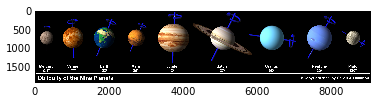

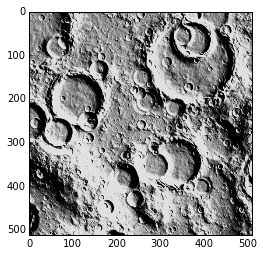

Start convert Edge Array 2 Hough Accumulation Matrix
Image H-Matrix


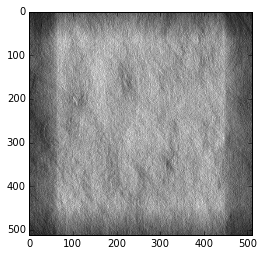

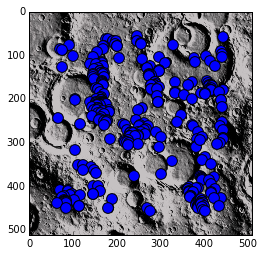

In [ ]:
#Read Image
im_moon_craters = imread("HW2/Images/Q2/MoonCraters.jpg")
im_planets = imread("HW2/Images/Q2/Planets.jpeg")
im_colorful = imread("HW2/Images/Q2/colorful3.jpg")
im_ladybug = imread("HW2/Images/Q2/ladybug.jpg")
radius = 65
usegradient=1
plt.imshow(im_planets)
plt.show()
df_im1 = detectCircles(im_moon_craters,radius,usegradient)
draw1 = draw_circles_on_image(im_moon_craters,df_im1,radius)

df_im2 = detectCircles(im_planets,radius,usegradient)
draw2 = draw_circles_on_image(im_planets,df_im2,radius)

df_im3 = detectCircles(im_colorful,radius,usegradient)
draw3 = draw_circles_on_image(im_colorful,df_im3,radius)

df_im4 = detectCircles(im_ladybug,radius,usegradient)
draw4 = draw_circles_on_image(im_ladybug,df_im4,radius)
    
#circle_centers_of_images = [df_im1,df_im2,df_im3,df_im4]
   

In [8]:
# Draw circles on images
# 
# Given image   = original image.
#       centers = centers computed based on detectCircles
#        
def draw_circles_on_image(image,centers,radius):
    
    for i in range(len(centers)):
        #Draw a circle
        x,y = centers[i]
        circle_area = ( radius ** 2 ) * math.pi
        plt.scatter(y,x , s=math.pow(circle_area,.5), alpha=1.0)

    plt.imshow(image, cmap = cm.Greys_r)
    plt.show()
    return plt

In [ ]:
#circle_centers_of_images
#draw2 = draw_circles_on_image(im_planets,circle_centers_of_images[1])
#draw3 = draw_circles_on_image(im_colorful,circle_centers_of_images[2])
#draw4 = draw_circles_on_image(im_ladybug,circle_centers_of_images[3])


In [ ]:
x,y = df_im1[2]

In [ ]:
x

In [ ]:
area = ( radius ** 2 ) * math.pi

In [ ]:
area